### Import libraries

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler


## Data Acquisition and Collection
###### Acquire the necessary data from Mall_Customers.csv

In [36]:
# Read the .CSV file
df = pd.read_csv("/home/felipe/Documents/tier0/segment-shopping-customer/mall_customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
295,296,Male,44,78,40
296,297,Female,66,35,20
297,298,Female,51,54,39
298,299,Male,35,30,96


## Data Preprocessing
###### Performing data preprocessing tasks such as encoding.

In [37]:
df = df.drop("CustomerID", axis=1)
df.tail()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
295,Male,44,78,40
296,Female,66,35,20
297,Female,51,54,39
298,Male,35,30,96
299,Male,51,84,96


## Exploratory Data Analysis (EDA)
###### Exploring the dataset to gain insights into its structure, patterns, and relationships, and visualizing the data using charts, graphs, and summary statistics to identify trends, correlations, and anomalies.

#### Univariate analysis

In [38]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,300.000000,300.00000,300.000000
mean,40.486667,65.56000,48.936667
std,14.511781,33.36531,26.490599
min,18.000000,10.00000,1.000000
25%,29.000000,39.00000,29.000000
50%,39.000000,62.00000,48.000000
75%,51.000000,85.00000,72.000000
max,70.000000,149.00000,99.000000


##### kernel density estimate (KDE) 

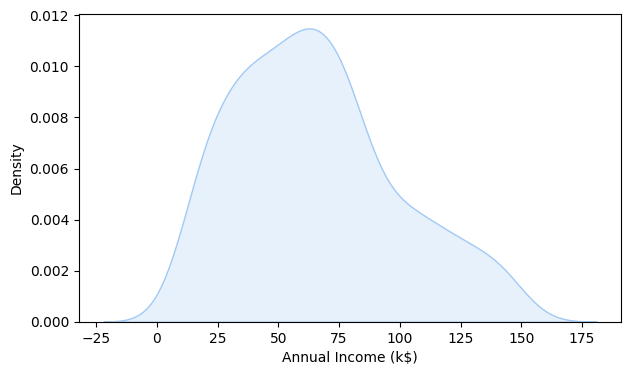

In [39]:
plt.figure(figsize=(7, 4))

# Plot the distribution of Annual Income
sns.kdeplot(data=df["Annual Income (k$)"], shade=True)

plt.show()

##### Histogram

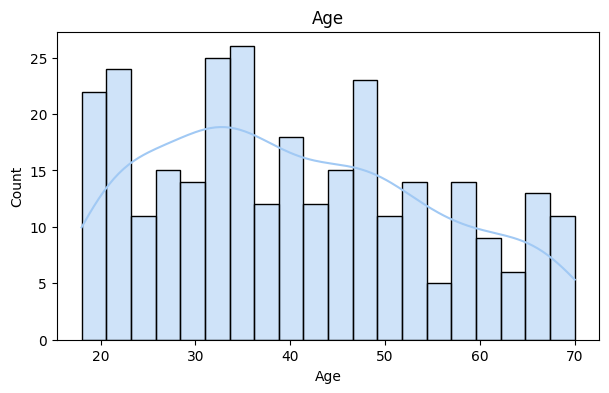

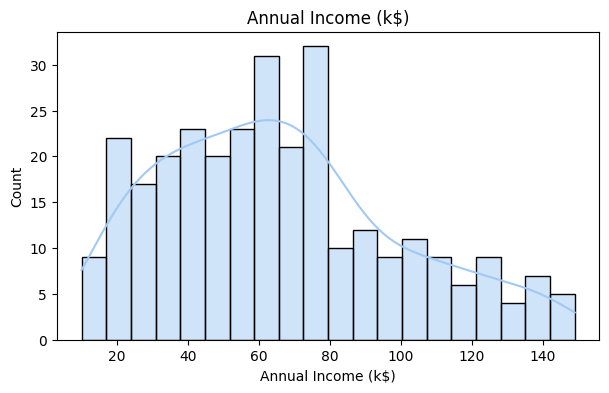

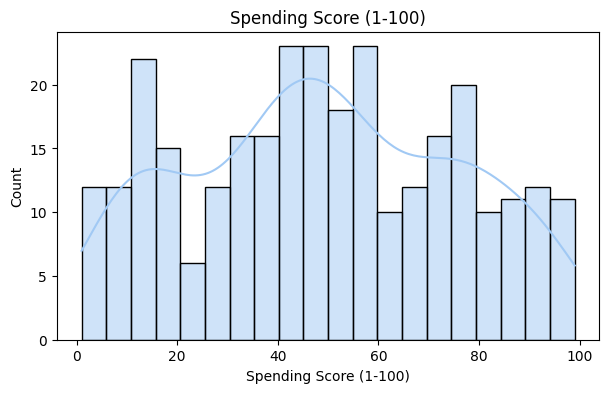

In [40]:
columns = ["Age", "Annual Income (k$)",	"Spending Score (1-100)"]

for c in columns:
    # Set the figure size
    plt.figure(figsize=(7, 4))

    # Customize the color palette
    sns.set_palette("pastel")

    # Plot the distribution of Annual Income
    sns.histplot(data=df[c], bins=20, kde=True)

    # Add title and axis labels
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel("Count")
    
    plt.show()

##### Boxplot

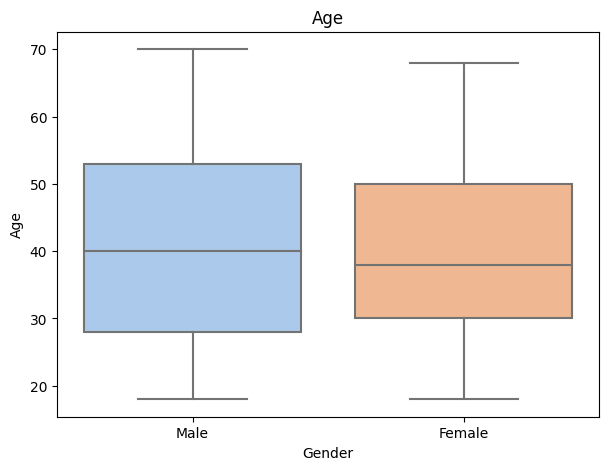

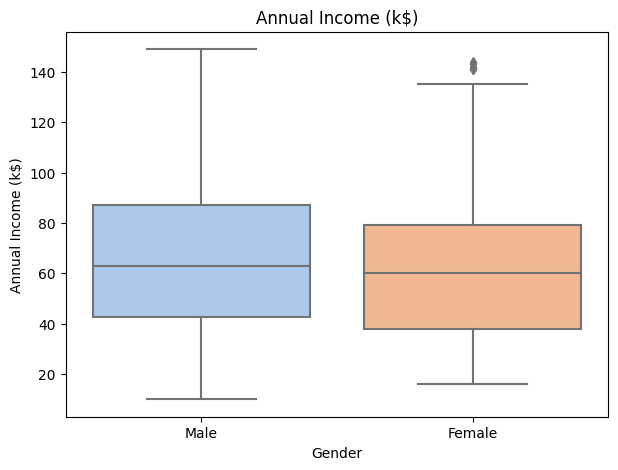

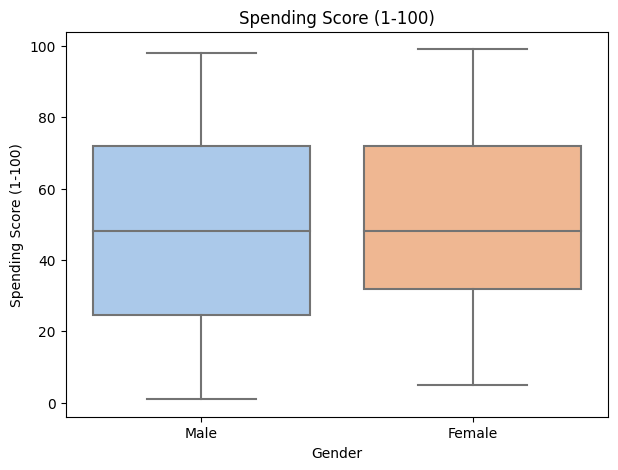

In [41]:
columns = ["Age", "Annual Income (k$)",	"Spending Score (1-100)"]

for c in columns:
    # Set the figure size
    plt.figure(figsize=(7, 5))

    # Plot the distribution of Annual Income
    sns.boxplot(data=df, x="Gender", y=df[c])

    # Add title and axis labels
    plt.title(c)
    plt.xlabel("Gender")
    plt.ylabel(c)
    
    plt.show()

In [42]:
percent_female, percent_male = df["Gender"].value_counts(normalize=True)
print(f"{percent_female} are female and {percent_male} are male")

0.5233333333333333 are female and 0.4766666666666667 are male


#### Bivariate analysis

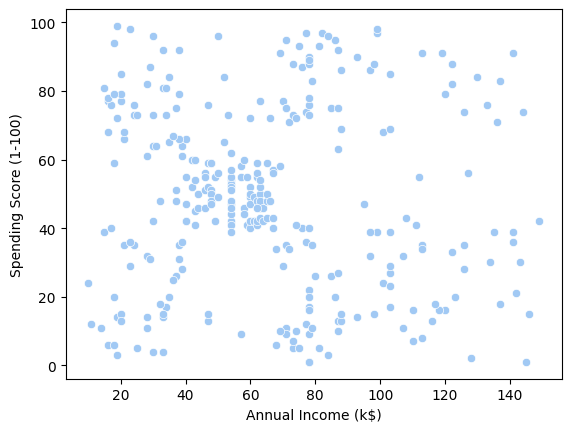

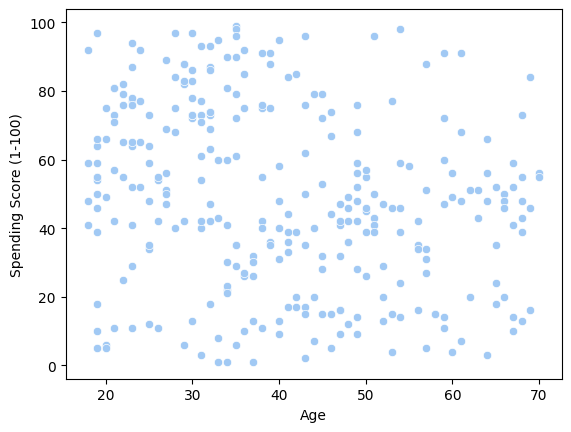

In [43]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()

sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.show()

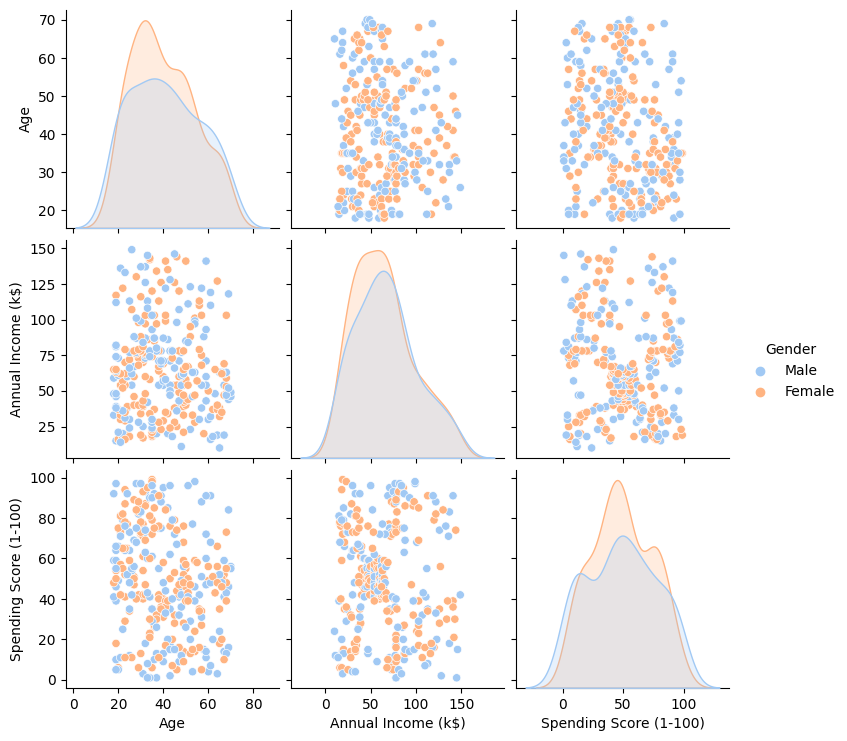

In [44]:
sns.pairplot(df, hue="Gender")
plt.show()

In [45]:
df.groupby(["Gender"])["Age", "Annual Income (k$)",	"Spending Score (1-100)"].mean()

/tmp/ipykernel_158322/1755180588.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Gender"])["Age", "Annual Income (k$)",	"Spending Score (1-100)"].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,40.019108,64.337580,49.210191
Male,41.000000,66.902098,48.636364


##### Correlation

In [46]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.016390,-0.234339
Annual Income (k$),-0.016390,1.000000,-0.078378
Spending Score (1-100),-0.234339,-0.078378,1.000000


<AxesSubplot:>

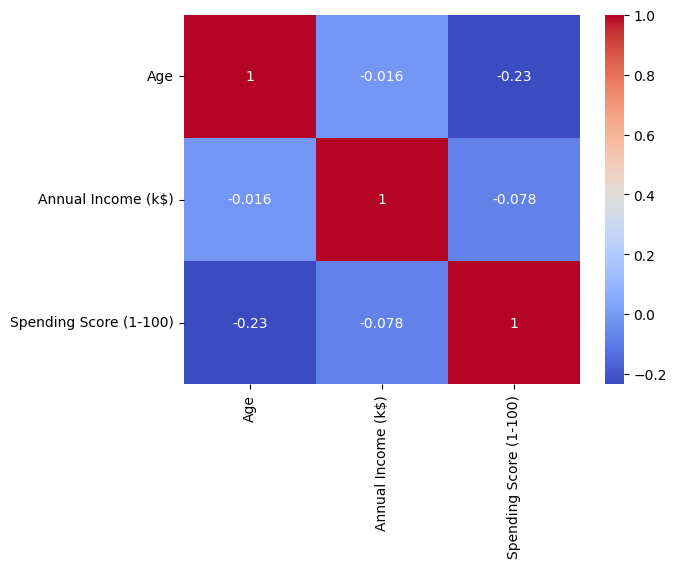

In [47]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## Model Selection and Training
###### Selected the clustering algorithm(KMeans) to solve the problem.


##### Clustering - Univariate

In [48]:
clustering_univariate = KMeans()
clustering_univariate.fit(df[["Annual Income (k$)"]])
clustering_univariate.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6,
       1, 1, 2, 2, 4, 3, 2, 3, 0, 1, 6, 5, 4, 1, 4, 4, 4, 0, 7, 0, 2, 0,
       3, 4, 4, 6, 6, 3, 4, 2, 4, 2, 0, 4, 1, 3, 0, 2, 5, 0, 6, 6, 6, 1,
       1, 6, 1, 6, 7, 7, 4, 6, 7, 7, 7, 4, 3, 7, 0, 2, 6, 4, 6, 1, 1, 4,
       2, 6, 4, 1, 6, 1, 1, 4, 2, 1, 2, 6, 1, 1, 4, 5, 4, 5, 6, 2, 6, 5,
       0, 6, 7, 5, 0, 3, 4, 3, 3, 5, 4, 7, 4, 5], d

In [49]:
df["Income Cluster"] = clustering_univariate.labels_
print(df["Income Cluster"].value_counts())
df.tail()

5    60
0    50
4    49
7    43
2    36
3    23
6    23
1    16
Name: Income Cluster, dtype: int64


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
295,Male,44,78,40,5
296,Female,66,35,20,4
297,Female,51,54,39,7
298,Male,35,30,96,4
299,Male,51,84,96,5


It is a measure of how tightly the clusters are packed around their centroids.

In [50]:
clustering_univariate.inertia_

5897.931368339716

###### This plot helps visualize how the inertia score changes as the number of clusters increases, aiding in the selection of the optimal number of clusters for the dataset.

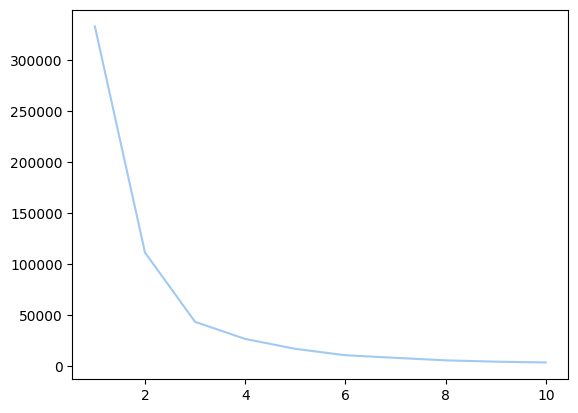

In [51]:
inertia_univariate_scores = []
for i in range(1, 11):
    kmeans_univariate = KMeans(n_clusters=i)
    kmeans_univariate.fit(df[["Annual Income (k$)"]])
    inertia_univariate_scores.append(kmeans_univariate.inertia_)

plt.plot(range(1, 11), inertia_univariate_scores)

In [52]:
df.groupby("Income Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.860000,63.020000,48.740000
1,36.312500,139.625000,46.875000
2,37.000000,18.972222,50.583333
3,41.739130,100.434783,48.347826
4,39.877551,34.775510,50.734694
5,36.316667,78.850000,48.216667
6,43.260870,118.565217,40.782609
7,47.720930,49.488372,52.186047


##### Clustering - Bivariate

In [53]:
clustering_bivariate = KMeans()
clustering_bivariate.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
clustering_bivariate.labels_

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1,
       5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 6, 7, 6, 0, 6,
       0, 6, 4, 4, 4, 7, 4, 7, 3, 0, 7, 3, 4, 0, 4, 4, 4, 2, 1, 1, 4, 1,
       7, 5, 1, 6, 7, 2, 4, 5, 1, 5, 3, 1, 0, 7, 1, 4, 1, 2, 7, 7, 7, 0,
       0, 0, 6, 0, 4, 4, 4, 7, 5, 1, 5, 4, 7, 1, 1, 4, 7, 5, 6, 6, 0, 5,
       5, 6, 5, 6, 7, 0, 6, 5, 5, 0, 4, 7, 6, 0, 4, 3, 4, 2, 0, 5, 7, 3,
       3, 6, 4, 3, 3, 7, 5, 7, 7, 3, 5, 1, 4, 2], d

In [54]:
df["Spending and Income Cluster"] = clustering_bivariate.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,2,5
1,Male,21,15,81,2,4
2,Female,20,16,6,2,5
3,Female,23,16,77,2,4
4,Female,31,17,40,2,5
...,...,...,...,...,...,...
295,Male,44,78,40,5,3
296,Female,66,35,20,4,5
297,Female,51,54,39,7,1
298,Male,35,30,96,4,4


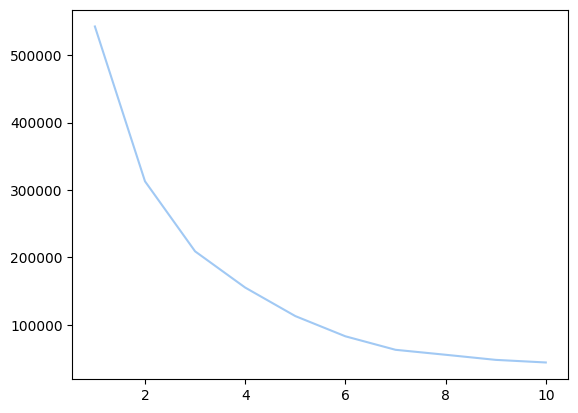

In [55]:
inertia_bivariate_scores = []
for i in range(1, 11):
    kmeans_bivariate = KMeans(n_clusters=i)
    kmeans_bivariate.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_bivariate_scores.append(kmeans_bivariate.inertia_)
plt.plot(range(1, 11), inertia_bivariate_scores)

##### The points are colored based on the cluster labels generated by some clustering algorithm

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

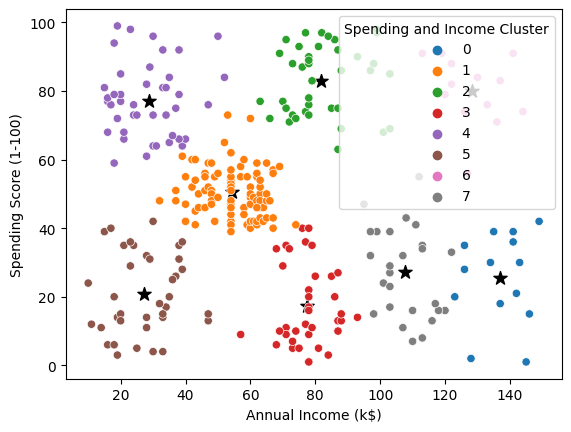

In [56]:
centers = pd.DataFrame(clustering_bivariate.cluster_centers_, columns=["x", "y"])
plt.scatter(x=centers["x"], y=centers["y"], s=100, c="black", marker="*")
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Spending and Income Cluster", palette="tab10")
plt.savefig("clustering_bivariate.png")

##### Percentage of the clusters by genre

In [57]:
pd.crosstab(df["Spending and Income Cluster"], df["Gender"], normalize="index")

Gender,Female,Male
Spending and Income Cluster,,
0,0.571429,0.428571
1,0.577778,0.422222
2,0.475000,0.525000
3,0.432432,0.567568
4,0.534884,0.465116
5,0.513514,0.486486
6,0.461538,0.538462
7,0.538462,0.461538


##### Clustering - Multivariate

In [58]:
scale = StandardScaler()

##### Convert categorical variables into indicator
###### Contain dummy variables for each categorical variable in the original DataFrame

In [59]:
df_categorical_encoded = pd.get_dummies(df, drop_first=True)
df_categorical_encoded = df_categorical_encoded[["Age", "Annual Income (k$)", "Spending Score (1-100)", "Income Cluster", "Gender_Male"]]
df_categorical_encoded

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Gender_Male
0,19,15,39,2,1
1,21,15,81,2,1
2,20,16,6,2,0
3,23,16,77,2,0
4,31,17,40,2,0
...,...,...,...,...,...
295,44,78,40,5,1
296,66,35,20,4,0
297,51,54,39,7,0
298,35,30,96,4,1


In [60]:
clustering_multivariate = KMeans()
clustering_multivariate.fit(df_categorical_encoded[["Annual Income (k$)", "Spending Score (1-100)", "Gender_Male"]])
clustering_multivariate.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 7,
       3, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6, 2, 6, 5, 6, 5, 6, 5, 6, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4,
       1, 4, 0, 0, 0, 5, 0, 5, 2, 1, 5, 2, 0, 1, 0, 0, 0, 6, 7, 7, 0, 7,
       5, 3, 7, 4, 5, 6, 0, 3, 7, 3, 2, 7, 1, 5, 7, 0, 7, 6, 5, 5, 5, 1,
       1, 1, 4, 1, 0, 0, 0, 5, 3, 7, 3, 0, 5, 7, 7, 0, 1, 3, 4, 4, 1, 3,
       3, 4, 3, 4, 4, 1, 4, 3, 3, 1, 0, 5, 4, 1, 0, 2, 0, 6, 1, 3, 5, 2,
       2, 4, 0, 2, 2, 5, 3, 5, 5, 2, 3, 7, 0, 6], d

In [68]:
df_categorical_encoded["Spending and Income Cluster"] = clustering_multivariate.labels_
df_categorical_encoded.tail()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Gender_Male,Spending and Income Cluster
295,44,78,40,5,1,2
296,66,35,20,4,0,3
297,51,54,39,7,0,7
298,35,30,96,4,1,0
299,51,84,96,5,1,6


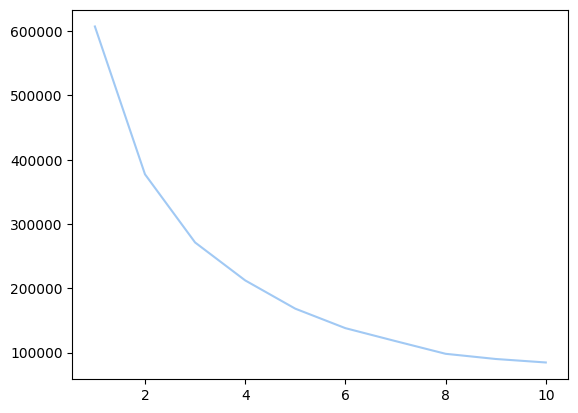

In [62]:
inertia_multivariate_scores = []
for i in range(1, 11):
    kmeans_multivariate = KMeans(n_clusters=i)
    kmeans_multivariate.fit(df_categorical_encoded)
    inertia_multivariate_scores.append(kmeans_multivariate.inertia_)

plt.plot(range(1, 11), inertia_multivariate_scores)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

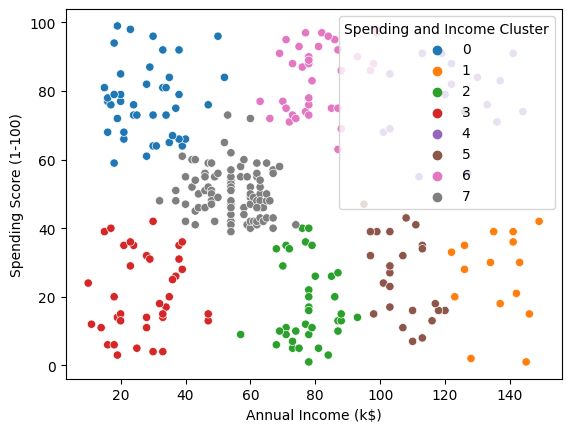

In [69]:
sns.scatterplot(data=df_categorical_encoded, x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Spending and Income Cluster", palette="tab10")